### Experiments with Activation Functions
* https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html
* https://keras.io/activations/
.

####  Actuvation Functions
* Activation functions play a crucial role in Neural Networks. Activation functions determine the output of a deep learning model, its accuracy of the model. Activation function determines whether the output of the neuron should be activated (“fired”) or not, based on whether each neuron’s input is relevant for the model’s prediction.
* Activation functions also help normalize the output of each neuron to a range between 1 and 0 or between -1 and 1. 
* Activation functions also have a major effect on the neural network’s ability to converge.

**No Activation**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


### MNIST Dataset

* We will be using the MNIST dataset for this set of experiments. The MNIST database consists of handwritten digits which has a training set of 60,000 images and a test set of 10,000 images. Image size is 28 * 28.



* Keras Documentation.

* For more information on the packages and different functions and what each parameter means, please refer the Keras Documentation here : https://keras.io/

### Pre Processing

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10
x_train = x_train.reshape(60000, 784) # reshape each image to a vector
x_test = x_test.reshape(10000, 784) # reshape each image to a vector
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255   # Normalize data : Normalisation is required so that all the inputs are at a comparable range. Helps model to learn more features faster.
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


print( 'Train size:', x_train.shape[0])
print( 'Sample  y:', y_train[0])
print('Test size:', x_test.shape[0])

Train size: 60000
Sample  y: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Test size: 10000


### Model

In [3]:
model = Sequential()    # The sequential API allows you to create models layer-by-layer for most problems
model.add(Dense(512, input_shape=(784,))) # Input layer , 512 - No of neurons
model.add(Dense(num_classes, activation='softmax'))  # Output layer

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)

print (model.summary())

W0619 02:41:31.925254 140174107137920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0619 02:41:31.943030 140174107137920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0619 02:41:31.945511 140174107137920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



dense_1 (None, 784) ==> (None, 512)
dense_2 (None, 512) ==> (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


### Compiling and Training the Model

W0619 02:41:32.005821 140174107137920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0619 02:41:32.014116 140174107137920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0619 02:41:32.099986 140174107137920 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0619 02:41:32.157042 140174107137920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 48us/step - loss: 0.4025 - acc: 0.8834 - val_loss: 0.3182 - val_acc: 0.9106
Epoch 2/5
48000/48000 [==============================] - 1s 24us/step - loss: 0.3175 - acc: 0.9107 - val_loss: 0.2990 - val_acc: 0.9164
Epoch 3/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.3040 - acc: 0.9145 - val_loss: 0.2769 - val_acc: 0.9262
Epoch 4/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.2917 - acc: 0.9188 - val_loss: 0.2802 - val_acc: 0.9253
Epoch 5/5
10000/10000 [==============================] - 0s 33us/step
Test loss: 0.29
Test accuracy: 0.919


Text(0.5, 0, 'Epochs')

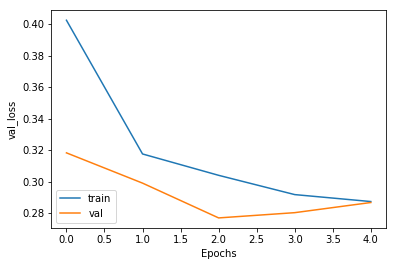

In [4]:
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=(0.2)) 

score = model.evaluate(x_test, y_test, verbose=1)

print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['train','val'],loc=3)
plt.ylabel('val_loss')
plt.xlabel('Epochs')

### Significance of Training loss and Validation loss

There are many interesting observations which you can learn from the above graph. It can tell you if your model is overfiting or underfiting.

Check out this link below for further details :
https://towardsdatascience.com/rnn-training-tips-and-tricks-2bf687e67527

### Adding More Layers Without any Activation

In [5]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Dense(512))
model.add(Dense(num_classes, activation='softmax'))

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)

print (model.summary())

dense_3 (None, 784) ==> (None, 512)
dense_4 (None, 512) ==> (None, 512)
dense_5 (None, 512) ==> (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 32us/step - loss: 0.4664 - acc: 0.8646 - val_loss: 0.3752 - val_acc: 0.8917
Epoch 2/5
48000/48000 [==============================] - 1s 28us/step - loss: 0.3671 - acc: 0.8958 - val_loss: 0.3211 - val_acc: 0.9093
Epoch 3/5
48000/48000 [==============================] - 1s 27us/step - loss: 0.3361 - acc: 0.9062 - val_loss: 0.3193 - val_acc: 0.9100
Epoch 4/5
48000/48000 [==============================] - 1s 27us/step - loss: 0.3228 - acc: 0.9079 - val_loss: 0.3135 - val_acc: 0.9126
Epoch 5/5
10000/10000 [==============================] - 0s 35us/step
Test loss: 0.344
Test accuracy: 0.898


Text(0.5, 0, 'Epochs')

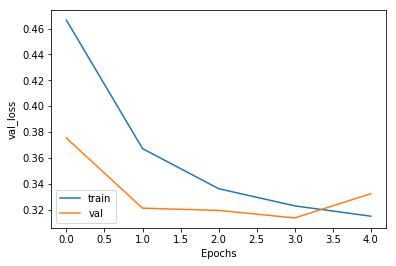

In [6]:
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=(0.2))

score = model.evaluate(x_test, y_test, verbose=1)

print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['train','val'],loc=3)
plt.ylabel('val_loss')
plt.xlabel('Epochs')

For further information on importance of activation function and different types of activation functions, you can go through the link below later.
https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f

### SIgmoid/Logistic
* 1Sigmoid activation function generates smooth output values without much "jumps or variations"
* Output values of sugmoid activation function varies between 0 and 1.
* Differentiable.
* The function is monotonic but function’s derivative is not.

#### Disadvantages
* For high and low output values of the neurons it gives same prediction which may lead to vanishing gradient prioblem.
* Outputs are not "zero" centered
* Computationally expensive.

In [7]:
#sigmoid
model = Sequential()
model.add(Dense(512, activation='sigmoid',input_shape=(784,))) #Add sigmoid activation function
model.add(Dense(num_classes, activation='softmax'))

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)

print (model.summary())

dense_6 (None, 784) ==> (None, 512)
dense_7 (None, 512) ==> (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 1s 29us/step - loss: 0.4690 - acc: 0.8743 - val_loss: 0.2863 - val_acc: 0.9182
Epoch 2/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.2561 - acc: 0.9248 - val_loss: 0.2214 - val_acc: 0.9367
Epoch 3/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.1997 - acc: 0.9414 - val_loss: 0.1785 - val_acc: 0.9492
Epoch 4/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.1606 - acc: 0.9521 - val_loss: 0.1545 - val_acc: 0.9563
Epoch 5/5
10000/10000 [==============================] - 0s 37us/step
Test loss: 0.13
Test accuracy: 0.963


Text(0.5, 0, 'Epochs')

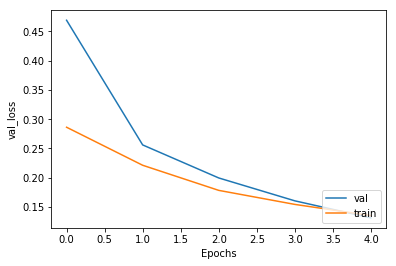

In [8]:
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=(0.2))

score = model.evaluate(x_test, y_test, verbose=1)

print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['val','train'],loc=4)
plt.ylabel('val_loss')
plt.xlabel('Epochs')

### tanh
* Zero centered.
* Output range is (-1,1). It strongly maps the neuron outputs as  positive and negative.
* The function is monotonic while its derivative is not monotonic.

#### Disadvantages
* Vanishing gradient problem.
* Computationally expensive.

In [9]:
model = Sequential()
model.add(Dense(512, activation='tanh',input_shape=(784,)))#Add relu activation function
model.add(Dense(num_classes, activation='softmax'))

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)

print (model.summary())

dense_8 (None, 784) ==> (None, 512)
dense_9 (None, 512) ==> (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 1s 29us/step - loss: 0.3616 - acc: 0.8932 - val_loss: 0.2422 - val_acc: 0.9293
Epoch 2/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.2008 - acc: 0.9408 - val_loss: 0.1619 - val_acc: 0.9526
Epoch 3/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.1369 - acc: 0.9593 - val_loss: 0.1299 - val_acc: 0.9633
Epoch 4/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.1004 - acc: 0.9701 - val_loss: 0.1147 - val_acc: 0.9656
Epoch 5/5
10000/10000 [==============================] - 0s 39us/step
Test loss: 0.09
Test accuracy: 0.973


Text(0.5, 0, 'Epochs')

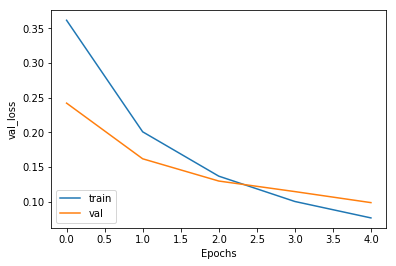

In [10]:
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=(0.2))


score = model.evaluate(x_test, y_test, verbose=1)

print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['train','val'],loc=3)
plt.ylabel('val_loss')
plt.xlabel('Epochs')

### Relu
* ReLU is the most widely used activation function.
* The range is (0,infinity).
* The function and its derivative both are monotonic.
* The function is computationally efficient and allows the model to converge very quickly.

#### Disadvantages

* The Dying ReLU problem: When inputs approach zero, or are negative, the gradient of the function becomes zero, the network cannot perform backpropagation and cannot learn.
* But the problem here  is that all the negative values are made zero immediately which decreases the ability of the model to fit the data properly. 


In [11]:
#relu
model = Sequential()
model.add(Dense(512, activation='relu',input_shape=(784,))) #Add relu activation function
model.add(Dense(num_classes, activation='softmax'))

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)

print (model.summary())

dense_10 (None, 784) ==> (None, 512)
dense_11 (None, 512) ==> (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 1s 30us/step - loss: 0.2843 - acc: 0.9183 - val_loss: 0.1423 - val_acc: 0.9597
Epoch 2/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.1174 - acc: 0.9654 - val_loss: 0.1072 - val_acc: 0.9681
Epoch 3/5
48000/48000 [==============================] - 1s 24us/step - loss: 0.0759 - acc: 0.9776 - val_loss: 0.0934 - val_acc: 0.9702
Epoch 4/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.0544 - acc: 0.9840 - val_loss: 0.0855 - val_acc: 0.9747
Epoch 5/5
10000/10000 [==============================] - 0s 34us/step
Test loss: 0.07
Test accuracy: 0.978


Text(0.5, 0, 'Epochs')

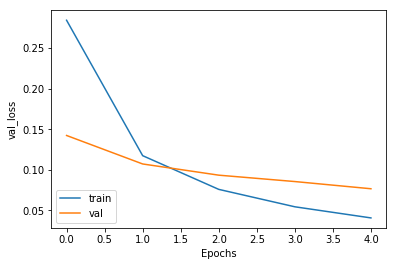

In [12]:
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=(0.2))


score = model.evaluate(x_test, y_test, verbose=1)

print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['train','val'],loc=3)
plt.ylabel('val_loss')
plt.xlabel('Epochs')

### Leaky Relu
#### Advantages
* Prevents dying ReLU problem by introducing a small positive slope in the negative area, so it does enable backpropagation, even for negative input values.

#### Disadvantahes
* Results not consistent—leaky ReLU does not provide consistent predictions for negative input values.

In [13]:
a =  keras.layers.LeakyReLU(alpha=0.3)
model = Sequential()
model.add(Dense(512, activation=a,input_shape=(784,))) #Add relu activation function
model.add(Dense(num_classes, activation='softmax'))

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)

print (model.summary())

dense_12 (None, 784) ==> (None, 512)
dense_13 (None, 512) ==> (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 1s 31us/step - loss: 0.3353 - acc: 0.9025 - val_loss: 0.2059 - val_acc: 0.9399
Epoch 2/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.1803 - acc: 0.9466 - val_loss: 0.1620 - val_acc: 0.9539
Epoch 3/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.1335 - acc: 0.9607 - val_loss: 0.1546 - val_acc: 0.9549
Epoch 4/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.1073 - acc: 0.9680 - val_loss: 0.1262 - val_acc: 0.9637
Epoch 5/5
10000/10000 [==============================] - 0s 35us/step
Test loss: 0.102
Test accuracy: 0.97


Text(0.5, 0, 'Epochs')

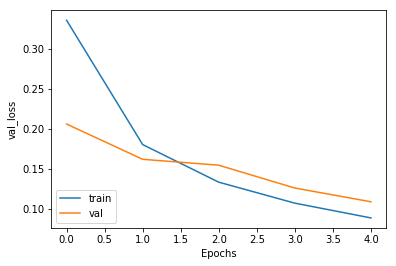

In [14]:
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=(0.2))


score = model.evaluate(x_test, y_test, verbose=1)

print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['train','val'],loc=3)
plt.ylabel('val_loss')
plt.xlabel('Epochs')

### PReLU
#### Advantages
PReLU allows the negative slope to be learned—unlike leaky ReLU, this function provides the slope of the negative part of the function as an argument. It is, therefore, possible to perform backpropagation and to to fit the data properly.

#### Disadvantages
* Performance may vary depending upon the type of data.

In [15]:
b = keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None)
model = Sequential()
model.add(Dense(512, activation=a,input_shape=(784,))) #Add relu activation function
model.add(Dense(num_classes, activation='softmax'))

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)

print (model.summary())

dense_14 (None, 784) ==> (None, 512)
dense_15 (None, 512) ==> (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 32us/step - loss: 0.3320 - acc: 0.9038 - val_loss: 0.1971 - val_acc: 0.9451
Epoch 2/5
48000/48000 [==============================] - 1s 27us/step - loss: 0.1806 - acc: 0.9479 - val_loss: 0.1615 - val_acc: 0.9521
Epoch 3/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.1344 - acc: 0.9610 - val_loss: 0.1360 - val_acc: 0.9607
Epoch 4/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.1065 - acc: 0.9683 - val_loss: 0.1133 - val_acc: 0.9673
Epoch 5/5
10000/10000 [==============================] - 0s 36us/step
Test loss: 0.116
Test accuracy: 0.965


Text(0.5, 0, 'Epochs')

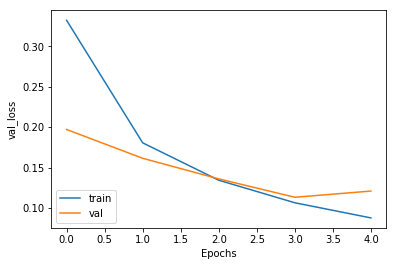

In [16]:
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=(0.2))


score = model.evaluate(x_test, y_test, verbose=1)

print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['train','val'],loc=3)
plt.ylabel('val_loss')
plt.xlabel('Epochs')

### Thresholded ReLU

In [17]:
c = keras.layers.ThresholdedReLU(theta=1.0)
model = Sequential()
model.add(Dense(512, activation=a,input_shape=(784,))) #Add relu activation function
model.add(Dense(num_classes, activation='softmax'))

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)

print (model.summary())

dense_16 (None, 784) ==> (None, 512)
dense_17 (None, 512) ==> (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 32us/step - loss: 0.3354 - acc: 0.9021 - val_loss: 0.2027 - val_acc: 0.9431
Epoch 2/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.1780 - acc: 0.9491 - val_loss: 0.1645 - val_acc: 0.9527
Epoch 3/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.1334 - acc: 0.9611 - val_loss: 0.1288 - val_acc: 0.9618
Epoch 4/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.1067 - acc: 0.9688 - val_loss: 0.1206 - val_acc: 0.9666
Epoch 5/5
10000/10000 [==============================] - 0s 35us/step
Test loss: 0.102
Test accuracy: 0.97


Text(0.5, 0, 'Epochs')

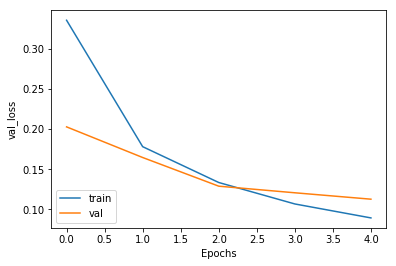

In [18]:
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=(0.2))


score = model.evaluate(x_test, y_test, verbose=1)

print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['train','val'],loc=3)
plt.ylabel('val_loss')
plt.xlabel('Epochs')

### elu
* A new activation function named Exponential Linear Unit or ELU was introduced. Researchers reveal that the function tend to converge cost to zero faster and produce more accurate results.
* ELU has a extra alpha constant which should be positive number.
* ELU is very similiar to RELU except negative inputs. They are both in identity function form for non-negative inputs. On the other hand, ELU becomes smooth slowly until its output equal to -α whereas RELU sharply smoothes.

In [19]:
model = Sequential()
model.add(Dense(512, activation='elu',input_shape=(784,)))#Add elu activation function
model.add(Dense(num_classes, activation='softmax'))

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)

print (model.summary())

dense_18 (None, 784) ==> (None, 512)
dense_19 (None, 512) ==> (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 33us/step - loss: 0.3626 - acc: 0.8934 - val_loss: 0.2457 - val_acc: 0.9313
Epoch 2/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.2009 - acc: 0.9410 - val_loss: 0.1552 - val_acc: 0.9568
Epoch 3/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.1366 - acc: 0.9595 - val_loss: 0.1285 - val_acc: 0.9633
Epoch 4/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.1031 - acc: 0.9701 - val_loss: 0.1172 - val_acc: 0.9656
Epoch 5/5
10000/10000 [==============================] - 0s 39us/step
Test loss: 0.1
Test accuracy: 0.971


Text(0.5, 0, 'Epochs')

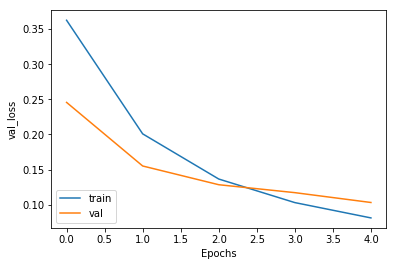

In [20]:
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=(0.2))


score = model.evaluate(x_test, y_test, verbose=1)

print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['train','val'],loc=3)
plt.ylabel('val_loss')
plt.xlabel('Epochs')

### Swish


* Swish is a new, self-gated activation function introduced by researchers at Google. In paper, they claimed that it performs better than ReLU with a similar level of computational efficiency.
* In experiments on ImageNet with identical models running ReLU and Swish, the new function achieved top -1 classification accuracy 0.6-0.9% higher.

In [28]:
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K

def swish(x):
    return (K.sigmoid(x) * x)
get_custom_objects().update({'swish': swish})

model = Sequential()
model.add(Dense(512, activation='swish',input_shape=(784,)))#Add elu activation function
model.add(Dense(num_classes, activation='softmax'))

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)

print (model.summary())

dense_23 (None, 784) ==> (None, 512)
dense_24 (None, 512) ==> (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 38us/step - loss: 0.3337 - acc: 0.9045 - val_loss: 0.1781 - val_acc: 0.9493
Epoch 2/5
48000/48000 [==============================] - 1s 27us/step - loss: 0.1468 - acc: 0.9569 - val_loss: 0.1246 - val_acc: 0.9657
Epoch 3/5
48000/48000 [==============================] - 1s 26us/step - loss: 0.0937 - acc: 0.9724 - val_loss: 0.0997 - val_acc: 0.9716
Epoch 4/5
48000/48000 [==============================] - 1s 26us/step - loss: 0.0679 - acc: 0.9797 - val_loss: 0.0837 - val_acc: 0.9745
Epoch 5/5
10000/10000 [==============================] - 0s 38us/step
Test loss: 0.074
Test accuracy: 0.976


Text(0.5, 0, 'Epochs')

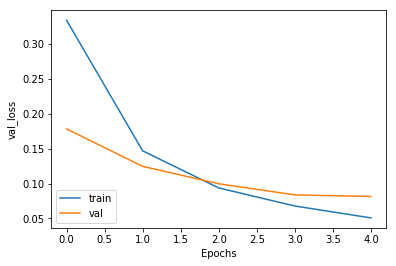

In [29]:
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=(0.2))


score = model.evaluate(x_test, y_test, verbose=1)

print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['train','val'],loc=3)
plt.ylabel('val_loss')
plt.xlabel('Epochs')

### Comparison

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 34us/step - loss: 0.4012 - acc: 0.8833 - val_loss: 0.3382 - val_acc: 0.9007
Epoch 2/10
48000/48000 [==============================] - 1s 25us/step - loss: 0.3162 - acc: 0.9116 - val_loss: 0.2945 - val_acc: 0.9190
Epoch 3/10
48000/48000 [==============================] - 1s 25us/step - loss: 0.3034 - acc: 0.9155 - val_loss: 0.2829 - val_acc: 0.9222
Epoch 4/10
48000/48000 [==============================] - 1s 25us/step - loss: 0.2938 - acc: 0.9179 - val_loss: 0.2830 - val_acc: 0.9225
Epoch 5/10
48000/48000 [==============================] - 1s 26us/step - loss: 0.2875 - acc: 0.9193 - val_loss: 0.2866 - val_acc: 0.9209
Epoch 6/10
48000/48000 [==============================] - 1s 25us/step - loss: 0.2827 - acc: 0.9203 - val_loss: 0.2939 - val_acc: 0.9213
Epoch 7/10
48000/48000 [==============================] - 1s 25us/step - loss: 0.2801 - acc: 0.9220 - val_loss: 0.2800 - val_acc

/usr/local/lib/python3.6/dist-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 37us/step - loss: 0.3368 - acc: 0.9016 - val_loss: 0.2025 - val_acc: 0.9433
Epoch 2/10
48000/48000 [==============================] - 1s 26us/step - loss: 0.1849 - acc: 0.9461 - val_loss: 0.1695 - val_acc: 0.9517
Epoch 3/10
48000/48000 [==============================] - 1s 26us/step - loss: 0.1381 - acc: 0.9597 - val_loss: 0.1476 - val_acc: 0.9569
Epoch 4/10
48000/48000 [==============================] - 1s 26us/step - loss: 0.1083 - acc: 0.9674 - val_loss: 0.1175 - val_acc: 0.9655
Epoch 5/10
48000/48000 [==============================] - 1s 25us/step - loss: 0.0896 - acc: 0.9733 - val_loss: 0.1188 - val_acc: 0.9641
Epoch 6/10
48000/48000 [==============================] - 1s 26us/step - loss: 0.0770 - acc: 0.9769 - val_loss: 0.1217 - val_acc: 0.9661
Epoch 7/10
48000/48000 [==============================] - 1s 26us/step - loss: 0.0671 - acc: 0.9800 - val_loss: 0.1017 - val_acc

/usr/local/lib/python3.6/dist-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as PReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 39us/step - loss: 0.2852 - acc: 0.9169 - val_loss: 0.1409 - val_acc: 0.9586
Epoch 2/10
48000/48000 [==============================] - 1s 27us/step - loss: 0.1169 - acc: 0.9655 - val_loss: 0.1029 - val_acc: 0.9695
Epoch 3/10
48000/48000 [==============================] - 1s 27us/step - loss: 0.0769 - acc: 0.9773 - val_loss: 0.0912 - val_acc: 0.9737
Epoch 4/10
48000/48000 [==============================] - 1s 27us/step - loss: 0.0546 - acc: 0.9835 - val_loss: 0.0805 - val_acc: 0.9771
Epoch 5/10
48000/48000 [==============================] - 1s 26us/step - loss: 0.0414 - acc: 0.9878 - val_loss: 0.0870 - val_acc: 0.9746
Epoch 6/10
48000/48000 [==============================] - 1s 27us/step - loss: 0.0309 - acc: 0.9909 - val_loss: 0.0789 - val_acc: 0.9772
Epoch 7/10
48000/48000 [==============================] - 1s 27us/step - loss: 0.0236 - acc: 0.9931 - val_loss: 0.0865 - val_acc

/usr/local/lib/python3.6/dist-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as ThresholdedReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 39us/step - loss: 0.4414 - acc: 0.8760 - val_loss: 0.2113 - val_acc: 0.9408
Epoch 2/10
48000/48000 [==============================] - 1s 27us/step - loss: 0.1856 - acc: 0.9450 - val_loss: 0.1496 - val_acc: 0.9581
Epoch 3/10
48000/48000 [==============================] - 1s 26us/step - loss: 0.1275 - acc: 0.9624 - val_loss: 0.1151 - val_acc: 0.9665
Epoch 4/10
48000/48000 [==============================] - 1s 26us/step - loss: 0.0962 - acc: 0.9719 - val_loss: 0.1079 - val_acc: 0.9675
Epoch 5/10
48000/48000 [==============================] - 1s 26us/step - loss: 0.0759 - acc: 0.9778 - val_loss: 0.0988 - val_acc: 0.9712
Epoch 6/10
48000/48000 [==============================] - 1s 27us/step - loss: 0.0625 - acc: 0.9812 - val_loss: 0.0930 - val_acc: 0.9743
Epoch 7/10
48000/48000 [==============================] - 1s 27us/step - loss: 0.0529 - acc: 0.9845 - val_loss: 0.0903 - val_acc

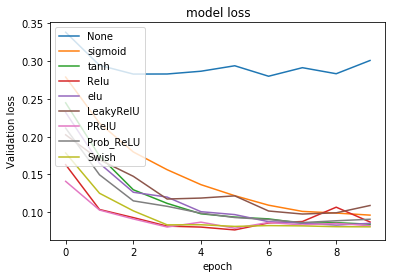

In [30]:
epochs = 10

for activation in [None, 'sigmoid', 'tanh', 'relu','elu',a,b,c,'swish']:
    model = Sequential()
    model.add(Dense(512, activation=activation, input_shape=(784,)))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=(0.2))
    
    plt.plot(history.history['val_loss'])
    
plt.title('model loss')
plt.ylabel('Validation loss')
plt.xlabel('epoch')
plt.legend(['None', 'sigmoid', 'tanh', 'Relu','elu','LeakyRelU','PRelU','Prob_ReLU','Swish'], loc='upper left')


###  Softmax

#### Advantages
* Generates probablistic outputs.
* Useful for output neurons—Normally Softmax is used only for the output layer, for neural networks that need to classify inputs into multiple categories